In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_wp = pd.read_csv("web_page_data.csv")
df_wp["Time"] *= 60
df_wp.head()

,Page,Time
0,Page A,12.6
1,Page B,151.8
2,Page A,21.0
3,Page B,42.6
4,Page A,40.2


21.40000000000002


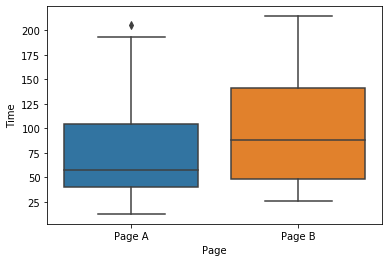

In [3]:
sns.boxplot(x="Page", y="Time", data=df_wp)
print(df_wp[df_wp["Page"]=="Page B"]["Time"].mean()-df_wp[df_wp["Page"]=="Page A"]["Time"].mean())

In [4]:
df_grp = df_wp.groupby("Page").mean()
print(df_grp.iloc[1]-df_grp.iloc[0])
df_grp

Time    21.4
dtype: float64


,Time
Page,
Page A,75.8
Page B,97.2


In [5]:
#permutations test
def permTest(x, n1, n2):
    n = n1+n2
    idx_b = np.random.randint(0, high=n, size=n1)
    idx_a = np.setdiff1d(np.arange(0, n, 1), idx_b)
    #print(idx_b, idx_a)
    mean_diff = x[idx_b].mean() - x[idx_a].mean()
    return mean_diff
permTest(df_wp["Time"].as_matrix(), 21, 15)



c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


-19.787969924812018

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


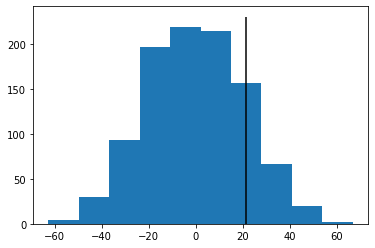

In [6]:
#np.random.randint?
#np.arange?
#np.setdiff1d?
perm_diffs = np.zeros((1000))
for i in range(1000):
    perm_diffs[i] = permTest(df_wp["Time"].as_matrix(), 21, 15)
plt.hist(x=perm_diffs)
plt.vlines(x=df_grp.iloc[1]-df_grp.iloc[0], ymin=plt.ylim()[0], ymax=plt.ylim()[1], color="k")

Text(0.5, 0, 'Session time differences (in seconds)')

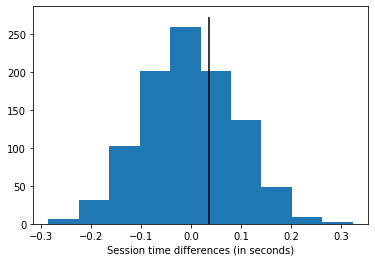

In [7]:
#plt.vlines?

obs_pct_diff = 100*(200/23739 - 182/22588)
conversion = np.concatenate((np.zeros((45945, )), np.ones(382)))
perm_diffs = np.zeros((1000, ))
for i in range(1000):
    perm_diffs[i] = 100*permTest(conversion, 23739, 22588)
plt.hist(x=perm_diffs)
plt.vlines(x=obs_pct_diff, ymin=plt.ylim()[0], ymax=plt.ylim()[1], color="k")
plt.xlabel("Session time differences (in seconds)")

In [8]:
print((perm_diffs>obs_pct_diff).mean())

0.335


In [9]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=np.array([200, 182]), nobs=np.array([23739, 22588]), alternative="larger", prop_var=False)

(0.437307786942451, 0.33094407441560325)

In [10]:
#np.concatenate?
#proportions_ztest?
from scipy.stats import ttest_ind

In [11]:
df_wp_pageA = df_wp[df_wp["Page"]=="Page A"]["Time"]
df_wp_pageB = df_wp[df_wp["Page"]=="Page B"]["Time"]
ttest_ind(a=df_wp_pageA, b=df_wp_pageB)

Ttest_indResult(statistic=-1.1237042154424826, pvalue=0.2690102436392601)

In [12]:
df_sess = pd.read_csv("four_sessions.csv")
df_sess.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


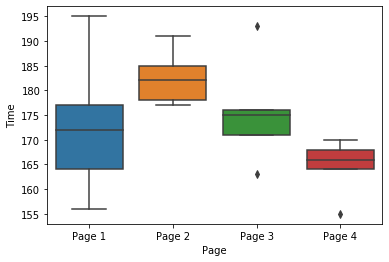

In [13]:
sns.boxplot(x="Page", y="Time", data=df_sess)

In [14]:
df_sess_pw = df_sess.pivot(columns="Page", values="Time").fillna(0)
df_sess_pw.head()

Page,Page 1,Page 2,Page 3,Page 4
0,164.0,0.0,0.0,0.0
1,0.0,178.0,0.0,0.0
2,0.0,0.0,175.0,0.0
3,0.0,0.0,0.0,155.0
4,172.0,0.0,0.0,0.0


In [15]:
from scipy.stats import f_oneway
f_oneway(df_sess_pw["Page 1"], df_sess_pw["Page 2"], df_sess_pw["Page 3"], df_sess_pw["Page 4"])

F_onewayResult(statistic=0.01155076597695945, pvalue=0.9982861294030126)

In [16]:
p1 = df_sess[df_sess["Page"]=="Page 1"]["Time"]
p2 = df_sess[df_sess["Page"]=="Page 2"]["Time"]
p3 = df_sess[df_sess["Page"]=="Page 3"]["Time"]
p4 = df_sess[df_sess["Page"]=="Page 4"]["Time"]
f_oneway(p1, p2, p3, p4)

F_onewayResult(statistic=2.739825341901467, pvalue=0.0775862152580146)

In [17]:
from statsmodels.regression.linear_model import OLS
#OLS?

In [89]:
df_click = pd.read_csv("click_rates.csv")
df_click.head()

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12


In [98]:
#pd.crosstab?
ob = df_click.pivot(index="Click", columns="Headline", values="Rate")
ob

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [99]:
#ex.replace?
ex = ob[:]
cl_m = ex.iloc[0].mean().round(2)
nc_m = ex.iloc[1].mean().round(2)
ex.loc["Click"] = cl_m
ex.loc["No-click"] = nc_m
ex

Headline,Headline A,Headline B,Headline C
Click,,,
Click,11.33,11.33,11.33
No-click,988.67,988.67,988.67


In [116]:
res = ((ob-ex)/ex.apply(np.sqrt)).round(3)
res_mat = res.values
res

Headline,Headline A,Headline B,Headline C
Click,,,
Click,0.793,-0.989,0.199
No-click,-0.085,0.106,-0.021


In [120]:
np.sum(np.sum(np.power(res_mat, 2), 1), 0).round(3)

1.665

In [135]:
from scipy.stats import chisquare
chisquare(ob, ex, axis=1)

Power_divergenceResult(statistic=array([1.64754634, 0.01888062]), pvalue=array([0.43877296, 0.99060411]))

In [173]:
df_fraud = pd.read_csv("imanishi_data.csv", names=["Digit", "Frequency"]).drop([0], axis=0)
df_fraud["Frequency"] = df_fraud["Frequency"].astype(int)
df_fraud["Exp"] = df_fraud["Frequency"].mean()
df_fraud

,Digit,Frequency,Exp
1,0,14,31.5
2,1,71,31.5
3,2,7,31.5
4,3,65,31.5
5,4,23,31.5
6,5,19,31.5
7,6,12,31.5
8,7,45,31.5
9,8,53,31.5
10,9,6,31.5


<BarContainer object of 10 artists>

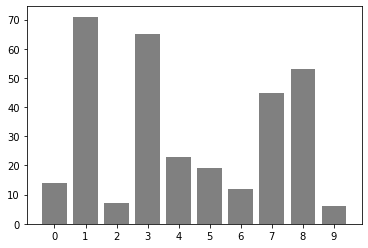

In [179]:
plt.bar(x="Digit", height="Frequency", data=df_fraud, color='grey')

In [176]:
chisquare(df_fraud["Frequency"], df_fraud["Exp"])

Power_divergenceResult(statistic=174.36507936507934, pvalue=7.59531890073772e-33)